# Principal Component Analysis (PCA) on MNIST Dataset

## 1. Load Data

In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mnist_test_nolabels.csv', header=0)

# Display the shape of the dataframe
print(f'DataFrame shape: {df.shape}')

# Display the first 5 rows
df.head()

DataFrame shape: (10000, 784)


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Perform PCA

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

X_Scaled = StandardScaler().fit_transform(df.values)
# Initialize PCA
pca = PCA(n_components=0.95) # Retain 95% of the variance

# Fit and transform the data
df_pca = pca.fit_transform(X_Scaled)

# Number of components chosen by PCA
print(f'Number of components chosen: {pca.n_components_}')

Number of components chosen: 280


## 3. Explained Variance Plot

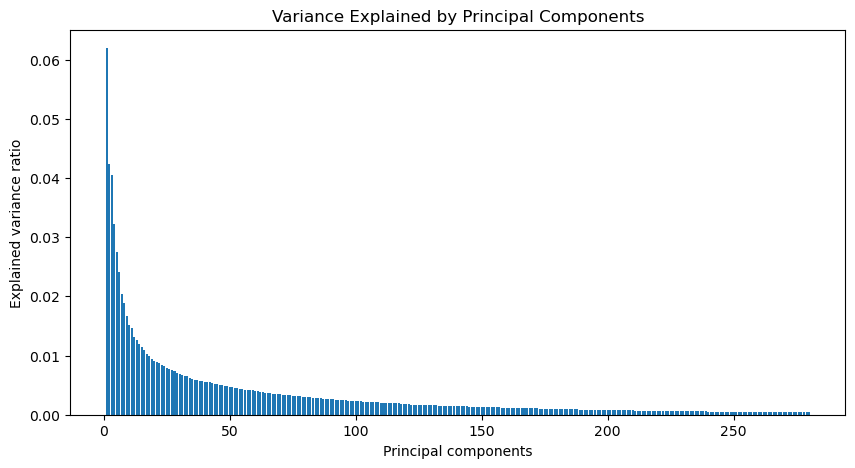

In [34]:
import matplotlib.pyplot as plt

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Explained by Principal Components')
plt.show()

## 4. Cumulative Explained Variance Plot

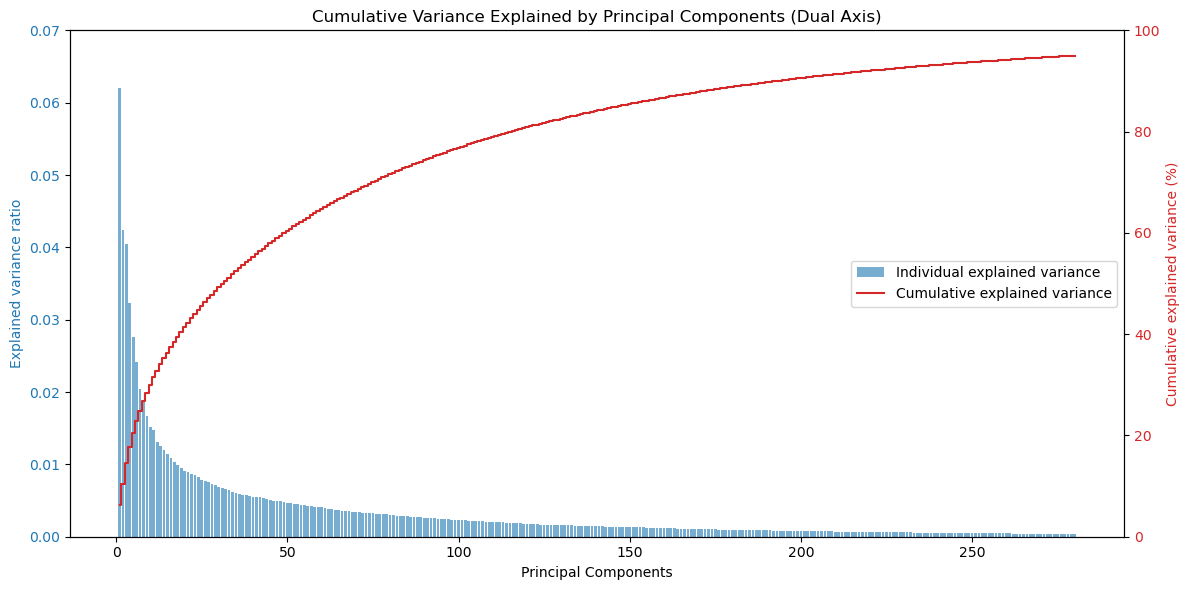

In [35]:
cumulative_variance = np.cumsum(explained_variance)

# Initialize the plot and the primary axis (Left)
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- LEFT AXIS: Individual Explained Variance ---
# Note: We do NOT multiply by 100 here, to match your requested 0.0-0.07 scale
color = 'tab:blue'
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained variance ratio', color=color)
bar_plot = ax1.bar(range(1, len(explained_variance) + 1), explained_variance, 
                   alpha=0.6, color=color, label='Individual explained variance')
ax1.tick_params(axis='y', labelcolor=color)

# Set specific scale and ticks for Left Y-Axis
ax1.set_ylim(0, 0.07)
ax1.set_yticks(np.arange(0, 0.08, 0.01)) # Ticks from 0.00 to 0.07

# --- RIGHT AXIS: Cumulative Variance ---
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Cumulative explained variance (%)', color=color)  
step_plot = ax2.step(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 
                     where='mid', color=color, label='Cumulative explained variance')
ax2.tick_params(axis='y', labelcolor=color)

# Set scale for Right Y-Axis
ax2.set_ylim(0, 100)

# --- COMBINED LEGEND ---
# Because we have two axes, we need to gather handles/labels from both
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.title('Cumulative Variance Explained by Principal Components (Dual Axis)')
plt.grid(axis='x', alpha=0.3) # Optional: adds vertical grid lines for readability
plt.tight_layout()
plt.show()

## 5. Scatter Plot of Principal Components

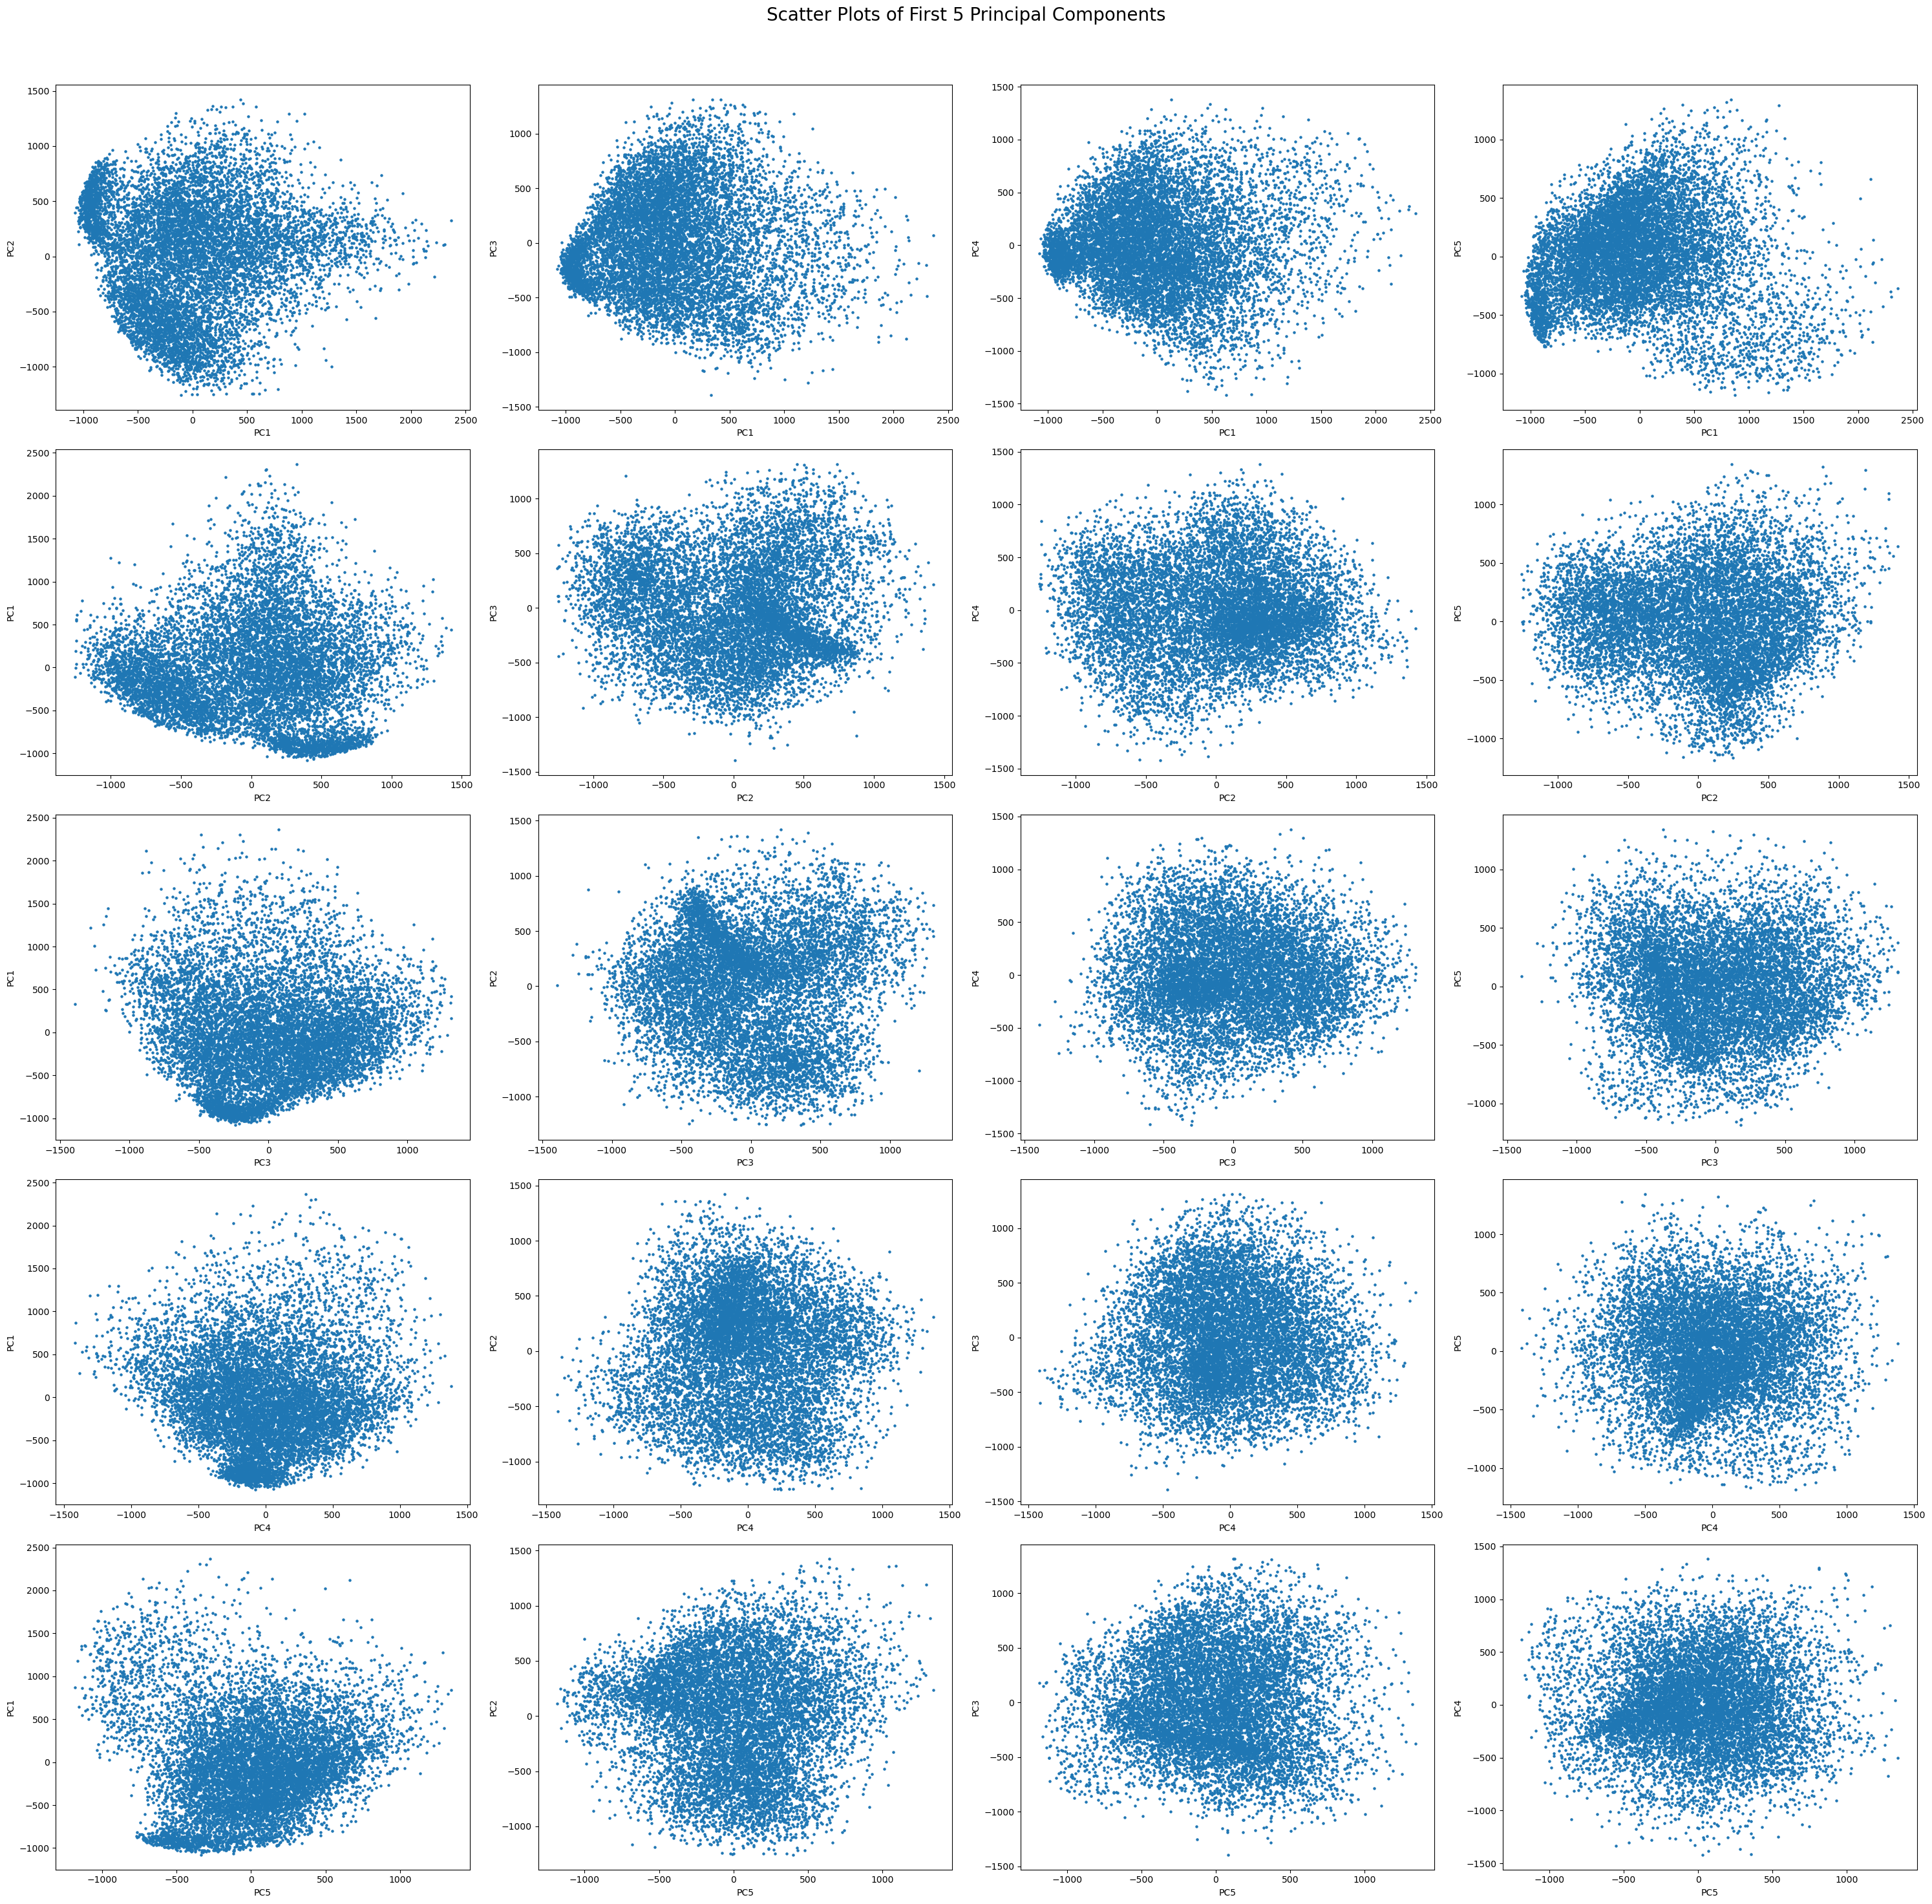

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 4, figsize=(30, 30))
fig.suptitle('Scatter Plots of First 5 Principal Components', fontsize=20)

for i in range(5):
    other_pcs = list(range(5))
    other_pcs.remove(i)
    for j_idx, j in enumerate(other_pcs):
        ax = axes[i, j_idx]
        ax.scatter(pca_df[f'PC{i+1}'], pca_df[f'PC{j+1}'], s=5)
        ax.set_xlabel(f'PC{i+1}')
        ax.set_ylabel(f'PC{j+1}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()